# **PROJETO EM GRUPO Módulo 3 – Criptomoedas**

>  Criptomoedas são moedas digitais descentralizadas baseadas em criptografia, que
operam em uma rede blockchain que permite transações seguras e transparentes
sem a necessidade de intermediários, como bancos. Elas fazem parte do mundo
digital, afetam a economia atual e são consideradas altamente voláteis.

*Neste projeto, faremos uma análise exploratória da série histórica dos valores de criptomoedas.*


## **IMPORTAÇÃO DO PANDAS E CRIAÇÃO DO DATAFRAME**

> Neste primeiro segmento, abordamos a importação da biblioteca Pandas, uma ferramenta essencial para análise de dados em Python. Utilizamos o Pandas para estruturar e manipular dados de forma eficA criação de um DataFrame, que é uma das principais estruturas de dados oferecidas pelo Pandas, permite armazenar e organizar os dados em formato de tabela, facilitando a análise e a manipulação subsequente. Essa etapa é fundamental para qualquer análise de dados, pois transforma dados brutos em um formato estruturado e acessível para exploração e visualização.*


### Importa a biblioteca Pandas

In [ ]:
import pandas as pd  # Importa a biblioteca Pandas, usada para manipulação e análise de dados
import seaborn as sns  # Importa a biblioteca Seaborn, uma biblioteca de visualização avançada para Python
import matplotlib.pyplot as plt  # Importa a biblioteca Matplotlib, usada para criação de gráficos e visualizações

# Lista de URLs para os arquivos CSV de diferentes criptomoedas
moedas = [
    "https://raw.githubusercontent.com/MatokoLB/tesr/main/coin_Bitcoin.csv",
    "https://raw.githubusercontent.com/MatokoLB/tesr/main/coin_Aave.csv",
    "https://raw.githubusercontent.com/MatokoLB/tesr/main/coin_BinanceCoin.csv",
    "https://raw.githubusercontent.com/MatokoLB/tesr/main/coin_Dogecoin.csv",
    "https://raw.githubusercontent.com/MatokoLB/tesr/main/coin_EOS.csv",
    "https://raw.githubusercontent.com/MatokoLB/tesr/main/coin_Ethereum.csv",
    "https://raw.githubusercontent.com/MatokoLB/tesr/main/coin_Litecoin.csv",
    "https://raw.githubusercontent.com/MatokoLB/tesr/main/coin_Solana.csv",
    "https://raw.githubusercontent.com/MatokoLB/tesr/main/coin_Tether.csv",
    "https://raw.githubusercontent.com/MatokoLB/tesr/main/coin_Uniswap.csv"
]

csvs = []  # Inicializa uma lista vazia para armazenar os DataFrames

# Itera sobre cada URL na lista 'moedas'
for url in moedas:
    df = pd.read_csv(url)  # Lê o CSV a partir da URL e cria um DataFrame
    csvs.append(df)  # Adiciona o DataFrame lido à lista 'csvs'

# Concatena todos os DataFrames da lista 'csvs' em um único DataFrame
# 'ignore_index=True' faz com que o índice seja reiniciado após a concatenação
df = pd.concat(csvs, ignore_index=True)




> *O DataFrame final 'df' está pronto para ser usado na análise*



### Exibição do DataFrame

In [ ]:
# Exibe o DataFrame 'df'
print(display(df))

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09
...,...,...,...,...,...,...,...,...,...,...
17142,288,Uniswap,UNI,2021-07-02 23:59:59,18.243571,16.983818,17.833072,18.241726,3.070457e+08,1.049364e+10
17143,289,Uniswap,UNI,2021-07-03 23:59:59,19.524757,17.849987,18.227339,19.524757,3.448554e+08,1.146609e+10
17144,290,Uniswap,UNI,2021-07-04 23:59:59,21.481411,18.947371,19.479936,20.771874,5.404909e+08,1.219861e+10
17145,291,Uniswap,UNI,2021-07-05 23:59:59,20.867785,19.180908,20.767419,20.095181,5.452744e+08,1.180130e+10


None


## **LIMPEZA DOS DADOS**

> Neste tópico, abordaremos o processo de limpeza dos dados, que é fundamental para garantir a integridade e a qualidade dos dados antes da análise. Discutiremos como identificar e tratar valores ausentes, remover duplicatas, lidar com inconsistências e erros, e eliminar outliers que possam distorcer os resultados.

*A limpeza de dados envolve também a padronização de formatos e a correção de discrepâncias, assegurando que os dados estejam prontos para análise precisa e confiável. Ao final, nossos dados estarão limpos, coerentes e em um formato apropriado para serem utilizados em análises mais aprofundadas,  facilitando a obtenção de insights mais confiáveis e relevantes.*

### Inspecionar os dados

*Primeiro, vamos inspecionar os dados para identificar valores ausentes ou inconsistentes e garantir que os tipos de dados estejam corretos.*

In [ ]:
print(df.info())  # Exibe um resumo do DataFrame, incluindo o número de entradas, tipos de dados e a contagem de valores não nulos em cada coluna

print(df.isnull().sum())  # Ira Calcular o total de valores nulos (ausentes) para cada coluna no DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17147 entries, 0 to 17146
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        17147 non-null  int64  
 1   Name       17147 non-null  object 
 2   Symbol     17147 non-null  object 
 3   Date       17147 non-null  object 
 4   High       17147 non-null  float64
 5   Low        17147 non-null  float64
 6   Open       17147 non-null  float64
 7   Close      17147 non-null  float64
 8   Volume     17147 non-null  float64
 9   Marketcap  17147 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 1.3+ MB
None
SNo          0
Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64


> O retorno dos métodos `df.info()` e `df.isnull().sum()` revela que todas as colunas do DataFrame têm valores presentes em todas as suas entradas, sem nenhum dado ausente. Observamos que `df.info()` indica a ausência de valores nulos em cada coluna, e essa observação é reforçada pelo `df.isnull().sum()`, que confirma que todas as colunas possuem zero valores nulos. Isso significa que o DataFrame está completo e pronto para ser utilizado em análises mais detalhadas, sem necessidade de tratamento adicional para dados ausentes.




### Verificar se há linhas duplicadas

*O código baixo realiza duas operações para verificar e contar linhas duplicadas no DataFrame.*

In [ ]:
print(df.duplicated())  # Verifica se há linhas duplicadas no DataFrame
print(df.duplicated().sum())  # Calcula a quantidade de linhas duplicadas no DataFrame


0        False
1        False
2        False
3        False
4        False
         ...  
17142    False
17143    False
17144    False
17145    False
17146    False
Length: 17147, dtype: bool
0




- *A primeira linha, `df.duplicated(),` retorna uma série booleana onde cada valor indica se a linha correspondente no DataFrame é uma duplicata (True) ou não (False).*

- *Em seguida,`(df.duplicated().sum())` calcula o total de linhas duplicadas contando quantas entradas na série booleana são True. Neste caso específico, o valor retornado é 2991, o que significa que há 2991 linhas no DataFrame que são duplicatas exatas de outras linhas.*

>Portanto, o resultado sugere que há um total de 2991 linhas duplicadas no DataFrame que precisariam ser revisadas ou removidas, dependendo do objetivo da análise. É importante lidar com duplicatas para evitar distorções nos resultados e garantir a precisão das análises posteriores.

---



O método que utilizamos para remover as linhas duplicadas é:

~~~python
df.drop_duplicates(inplace=True)
~~~


In [ ]:
print(df.drop_duplicates(inplace=True))

print(df.duplicated().sum())  # Exibir novamnete a quantidade de linhas duplicadas no DataFrame

None
0


### Deletado e Modificando Colunas

> Agora iremos deletar colunas indesejadas ou desnecessárias do DataFrame. Além disso, vamos modificar colunas existentes, incluindo alterações no tipo de dado e renomeação de colunas. Essas operações são cruciais para a manipulação eficiente e aprimoramento da estrutura de dados no contexto de análise.


---


**Alterações**:

- **Renomear Colunas** : Os nomes das colunas são traduzidos para português usando `df.rename()`.

- **Deletar Coluna SNo** : A coluna 'SNo' é desnecessária porque é apenas um índice sequencial que não adiciona valor à análise dos dados, já que o DataFrame já possui um índice padrão

- **Remover Notação Científica**: O formato padrão de exibição para floats é alterado para não usar notação científica, com `pd.options.display.float_format = '{:.2f}'.format`. As colunas 'Volume' e 'Capitalização de Mercado' são convertidas para o tipo float com astype(float) para garantir que mantenham as duas casas decimais.

- **Converter Coluna de Data**: A coluna 'Data' é convertida para o tipo datetime usando `pd.to_datetime()`.


#### Deletar coluna 'SNo' e Symbol

In [ ]:
df.drop(columns=['SNo'], inplace=True)

In [ ]:
df.drop(columns=['Symbol'], inplace=True)

#### Modificar nomes das colunas para português

In [ ]:
df.rename(columns={
    'Name': 'Nome',
    'Date': 'Data',
    'High': 'Alta',
    'Low': 'Baixa',
    'Open': 'Abertura',
    'Close': 'Fechamento',
    'Volume': 'Volume',
    'Marketcap': 'Capitalização de Mercado'
}, inplace=True)

#### Remover notação científica das colunas Volume e Marketcap e definir número de casas decimais

In [ ]:
#pd.options.display.float_format = '{:.2f}'.format
#df['Volume'] = df['Volume'].astype(float)
#df['Capitalização de Mercado'] = df['Capitalização de Mercado'].astype(float)
df['Volume'] = df['Volume'].apply(lambda x: '{:.0f}'.format(x))
df['Capitalização de Mercado'] = df['Capitalização de Mercado'].apply(lambda x: '{:.0f}'.format(x))

#### Converter coluna 'Data' para o tipo datetime

In [ ]:
df['Data'] = pd.to_datetime(df['Data']).dt.date
df['Data'] = pd.to_datetime(df['Data'])

#### DataFrame com todas as modificações aplicadas

In [ ]:
print(display(df))

,Nome,Data,Alta,Baixa,Abertura,Fechamento,Volume,Capitalização de Mercado
0,Bitcoin,2013-04-29,147.488007,134.000000,134.444000,144.539993,0,1603768864
1,Bitcoin,2013-04-30,146.929993,134.050003,144.000000,139.000000,0,1542813125
2,Bitcoin,2013-05-01,139.889999,107.720001,139.000000,116.989998,0,1298954594
3,Bitcoin,2013-05-02,125.599998,92.281898,116.379997,105.209999,0,1168517495
4,Bitcoin,2013-05-03,108.127998,79.099998,106.250000,97.750000,0,1085995169
...,...,...,...,...,...,...,...,...
17142,Uniswap,2021-07-02,18.243571,16.983818,17.833072,18.241726,307045716,10493637025
17143,Uniswap,2021-07-03,19.524757,17.849987,18.227339,19.524757,344855379,11466088853
17144,Uniswap,2021-07-04,21.481411,18.947371,19.479936,20.771874,540490915,12198611171
17145,Uniswap,2021-07-05,20.867785,19.180908,20.767419,20.095181,545274387,11801301167


None


### Conclusão

> Com essas alterações, nosso DataFrame está limpo e bem estruturado, pronto para seguirmos com a análise exploratória. Além disso, podemos exportar nosso DataFrame formatado para outros softwares como PostgreSQL, Power BI, entre outros, facilitando a integração e o uso em diversas plataformas de análise de dados.

**Metodos de exportação DataFrame :**
~~~python
df.to_csv('data.csv', index=False) # exportar o DataFrame para um arquivo CSV sem o índice
df.to_sql('data', if_exists='append', index=False) # exportar o DataFrame para uma tabela PostgreSQL
~~~

In [ ]:
df.to_csv('data2.csv', index=False)

In [ ]:
#import from sqlalchemy import create_engine

# Substitua 'sua_string_de_conexao_de_banco_de_dados' pelos detalhes reais da sua conexão de banco de dados

#engine = create_engine('sua_string_de_conexao_de_banco_de_dados')

#df.to_sql('data', if_exists='append', index=False)

## **ANÁLISE EXPLORATÓRIA**

> Realizaremos agora uma análise exploratória dos dados de criptomoedas para entender padrões e comportamentos fundamentais.A análise exploratória é crucial porque permite identificar tendências, variações e anomalias nos dados, fornecendo insights preliminares que orientam investigações mais profundas.

*Vamos explorar como os valores das criptomoedas se comportam, avaliar tendências de alta ou queda, calcular valores médios, e identificar os anos de maior variação. Além disso, investigaremos padrões relacionados aos dias da semana e compararemos a valorização histórica entre diferentes moedas. Este processo é essencial para construir uma base sólida de conhecimento sobre os dados antes de avançar para análises mais complexas e inferenciais.*


---


**Esta análise responderá às seguintes perguntas:**

* Como se comportaram os valores para todas as criptomoedas?

* Os valores tiveram uma tendência de queda ou de aumento?

* Quais os valores médios para todas as criptomoedas?

* Em quais anos houve maiores quedas e valorizações?

* Existe alguma tendência de aumento ou queda dos valores pelo dia da semana?

* Qual moeda se mostra mais interessante em relação à valorização pela análise da série histórica?

* Qual moeda se mostra menos interessante em relação à valorização pela análise da série histórica?

* Existe correlação entre os valores para todas as criptomoedas?

### Como se comportaram os valores para todas as criptomoedas?

In [ ]:
# Cálculo das estatísticas descritivas para todas as criptomoedas
df.describe()

,Data,Alta,Baixa,Abertura,Fechamento
count,17147,17147.000000,17147.000000,17147.000000,17147.000000
mean,2018-04-22 23:14:13.863649792,1271.659030,1194.597509,1235.100899,1237.218231
min,2013-04-29 00:00:00,0.000089,0.000085,0.000087,0.000087
25%,2016-08-15 00:00:00,1.004634,0.999775,1.000070,1.000089
50%,2018-07-23 00:00:00,9.266080,8.343150,8.742989,8.807600
75%,2020-03-27 00:00:00,209.160470,194.776035,202.548657,202.922053
max,2021-07-06 00:00:00,64863.098908,62208.964366,63523.754869,63503.457930
std,NaN,5512.244492,5154.920300,5347.271123,5352.965249


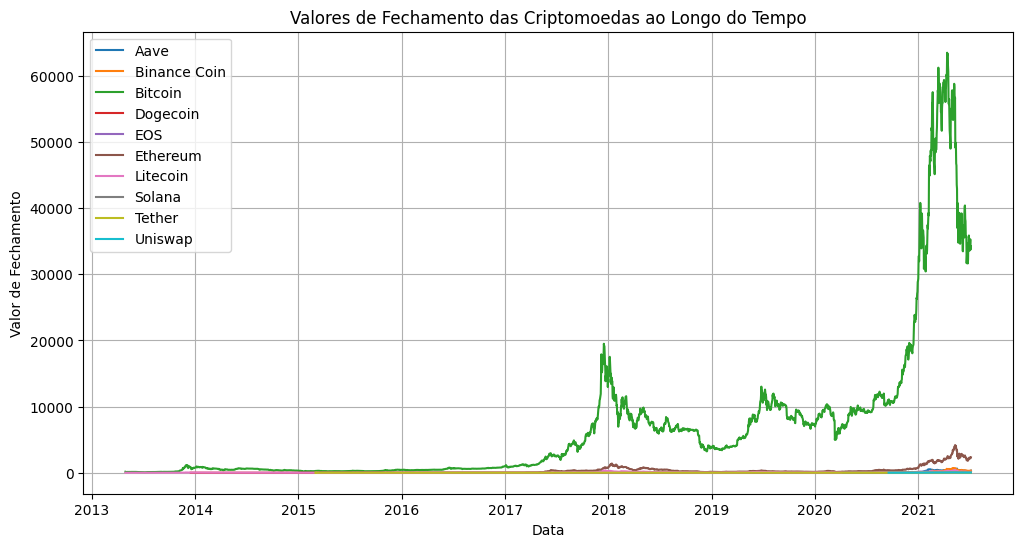

In [ ]:
import matplotlib.pyplot as plt

df_pivot = df.pivot(index='Data', columns='Nome', values='Fechamento')

# Plotar o gráfico de linhas para todos os valores de fechamento das criptomoedas
plt.figure(figsize=(12, 6))

for column in df_pivot.columns:
    plt.plot(df_pivot.index, df_pivot[column], label=column)

plt.title('Valores de Fechamento das Criptomoedas ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Valor de Fechamento')
plt.legend()
plt.grid(True)
plt.show()


### Os valores tiveram uma tendência de queda ou de aumento?

In [ ]:
df['valorizacao'] = df['Fechamento'] - df['Abertura']

media_variacao = df.groupby('Nome')['valorizacao'].mean()

# Determinando tendências gerais
tendencias_gerais = media_variacao.apply(lambda x: 'queda' if x < 0 else 'aumento')

# Criando um DataFrame para o gráfico
df_tendencias = pd.DataFrame({
    'Criptomoeda': media_variacao.index,
    'Variacao Media': media_variacao.values,
    'Tendencia': tendencias_gerais.values
})

df_tendencias.sort_values(by='Variacao Media',ascending=False)


,Criptomoeda,Variacao Media,Tendencia
2,Bitcoin,11.144203,aumento
5,Ethereum,1.030792,aumento
0,Aave,1.019157,aumento
1,Binance Coin,0.222076,aumento
7,Solana,0.071164,aumento
9,Uniswap,0.062478,aumento
6,Litecoin,0.031643,aumento
4,EOS,0.000794,aumento
3,Dogecoin,0.000093,aumento
8,Tether,0.000040,aumento


In [ ]:
# Os valores tiveram uma tendência de queda ou de aumento aos anos?

# Agrupar os dados por ano e nome da moeda e calcular a média da valorização
df_tendencia_ano = df.groupby([df['Data'].dt.year, 'Nome'])['valorizacao'].mean().reset_index()

# Determinar a tendência para cada ano e moeda
df_tendencia_ano['Tendencia'] = df_tendencia_ano['valorizacao'].apply(lambda x: 'Queda' if x < 0 else 'Aumento')

# Exibir o DataFrame resultante
df_tendencia_ano


,Data,Nome,valorizacao,Tendencia
0,2013,Bitcoin,2.340407e+00,Aumento
1,2013,Dogecoin,6.958381e-06,Aumento
2,2013,Litecoin,8.409320e-02,Aumento
3,2014,Bitcoin,-1.168245e+00,Queda
4,2014,Dogecoin,-7.938598e-07,Queda
5,2014,Litecoin,-6.027333e-02,Queda
6,2015,Bitcoin,3.043694e-01,Aumento
7,2015,Dogecoin,-5.137438e-08,Queda
8,2015,Ethereum,-1.310866e-02,Queda
9,2015,Litecoin,1.395045e-03,Aumento


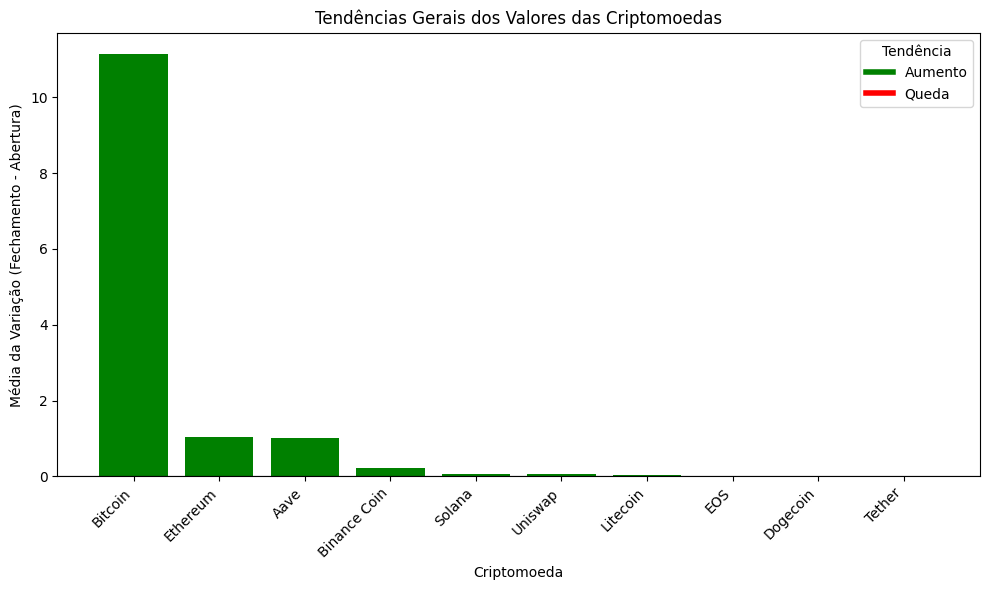

In [ ]:
import matplotlib.pyplot as plt
# Gráfico1
# Plotando o gráfico de barras
plt.figure(figsize=(10, 6))

# Definindo cores
colors = ['red' if t == 'queda' else 'green' for t in df_tendencias['Tendencia']]

# Ordenando os dados por variação média
df_tendencias_sorted = df_tendencias.sort_values(by='Variacao Media', ascending=False)

# Criando o gráfico de barras
plt.bar(df_tendencias_sorted['Criptomoeda'], df_tendencias_sorted['Variacao Media'], color=colors)

# Adicionando rótulos e título
plt.xlabel('Criptomoeda')
plt.ylabel('Média da Variação (Fechamento - Abertura)')
plt.title('Tendências Gerais dos Valores das Criptomoedas')
plt.xticks(rotation=45, ha='right')
plt.axhline(0, color='black', linewidth=0.8)

# Adicionando legenda
plt.legend(handles=[plt.Line2D([0], [0], color='green', lw=4, label='Aumento'),
                    plt.Line2D([0], [0], color='red', lw=4, label='Queda')],
           title='Tendência')

# Exibindo o gráfico
plt.tight_layout()
plt.show()


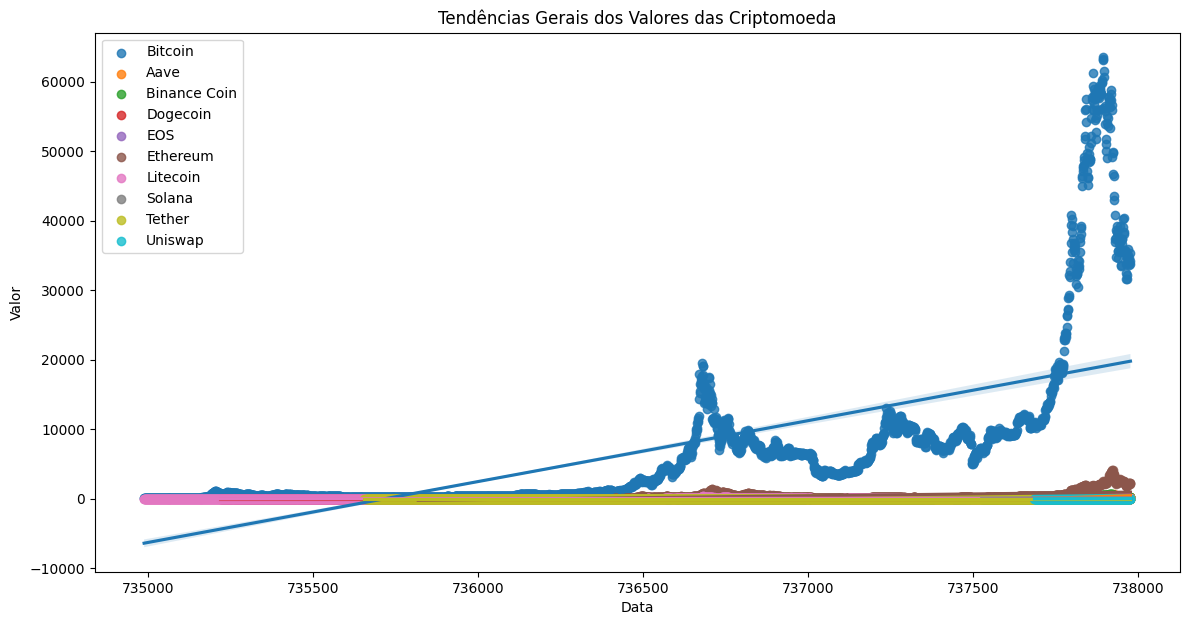

In [ ]:
# Gráfico2 valores tiveram uma tendência de queda ou de aumento?
plt.figure(figsize=(14, 7))

criptomoedas = df['Nome'].unique()
for moeda in criptomoedas:
    subset = df[df['Nome'] == moeda]
    sns.regplot(x=subset['Data'].map(pd.Timestamp.toordinal), y=subset['Fechamento'], label=moeda, order=1)

plt.title('Tendências Gerais dos Valores das Criptomoeda')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.legend(loc='upper left')
plt.show()


### Quais os valores médios para todas as criptomoedas?

*os valores médios de fechamento das criptomoedas fornecem uma visão inicial importante sobre seus preços médios e podem orientar estratégias de investimento e gerenciamento de portfólio no mercado de criptomoedas*.

In [ ]:
valores_medios = df.groupby('Nome')['Fechamento'].mean()
print(display(valores_medios))

Nome
Aave             255.525845
Binance Coin      52.250308
Bitcoin         6711.290443
Dogecoin           0.013763
EOS                4.624088
Ethereum         383.910691
Litecoin          49.279008
Solana            10.471388
Tether             1.000696
Uniswap           17.077256
Name: Fechamento, dtype: float64

None


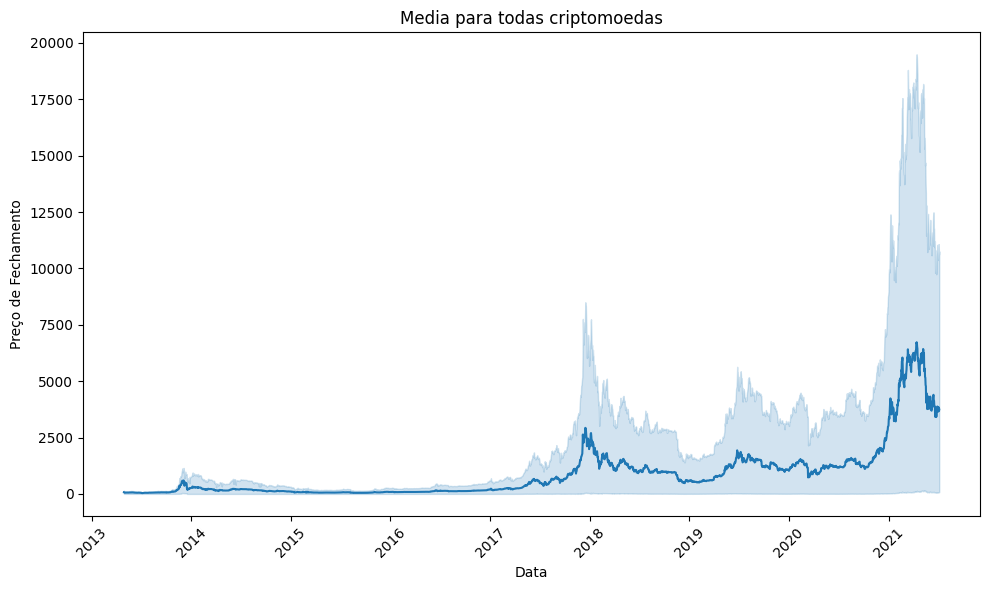

In [ ]:
# Gráfico de tendência geral dos preços de fechamento


plt.figure(figsize=(10, 6))
sns.lineplot(x='Data', y='Fechamento', data=df)
plt.title('Media para todas criptomoedas')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

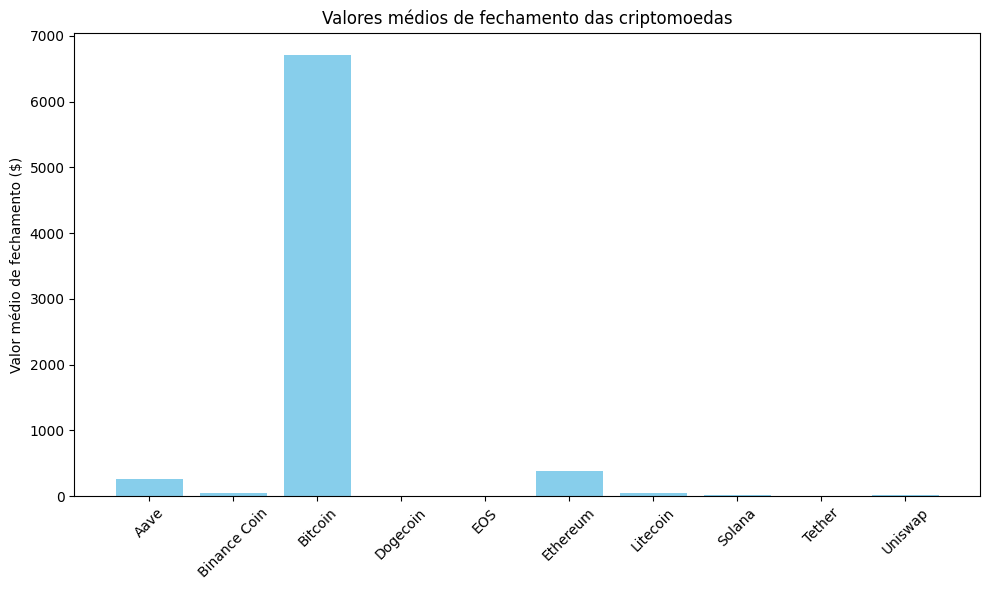

In [ ]:
# gráfico 2 de barras
plt.figure(figsize=(10, 6))
plt.bar(valores_medios.index, valores_medios.values, color='skyblue')
plt.ylabel('Valor médio de fechamento ($)')
plt.title('Valores médios de fechamento das criptomoedas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### **Análise Detalhada**
- **Bitcoin (BTC)**, Média: $6711.29
>> Análise: Bitcoin, sendo a criptomoeda pioneira, apresenta o valor médio de fechamento mais alto. Isso reflete seu papel dominante no mercado e seu valor percebido como um “ouro digital”. O preço elevado também indica a forte demanda e aceitação generalizada como uma reserva de valor.


---


- **Ethereum (ETH)**, Média: $383.91
>> Análise: Ethereum ocupa o segundo lugar com uma média significativamente alta. Sua funcionalidade além de ser uma moeda, oferecendo contratos inteligentes e DApps, impulsiona seu valor. A plataforma é crucial para o ecossistema de finanças descentralizadas (DeFi).

---

- **Aave (AAVE), Média: $255.53**
>> Análise: Aave é um protocolo DeFi que permite empréstimos e financiamentos de criptoativos. Seu valor médio reflete a crescente popularidade e uso de soluções DeFi.

---

- **Litecoin (LTC), Média: $49.28**
>>Análise: Litecoin, criado como uma "prata digital" em comparação ao "ouro digital" do Bitcoin, apresenta um valor médio considerável. Sua função principal como meio de pagamento e suas transações mais rápidas e baratas o tornam uma escolha popular.


---


- **Uniswap (UNI) Média: $17.08**
>>Análise: Uniswap é um dos maiores exchanges descentralizados (DEX) no espaço DeFi. Seu valor médio reflete a importância e o uso crescente de DEXs na negociação de criptomoedas sem intermediários.

---

- **Solana (SOL) Média: $10.47**
>>Análise: Solana é conhecida por sua alta velocidade e baixas taxas de transação, sendo uma plataforma de blockchain popular para DApps e DeFi. Seu valor médio reflete o aumento da adoção e a expansão do seu ecossistema.

---

- **EOS Média: $4.62**
>>Análise: EOS é uma plataforma blockchain focada em DApps e contratos inteligentes. Seu valor médio indica uma adoção moderada em comparação com Ethereum, que oferece funcionalidades semelhantes.

---

- **Tether (USDT), Média: 1.00 dolar**
>>Análise: Tether é uma stablecoin projetada para manter um valor fixo de $1.00, refletindo exatamente isso. É amplamente utilizada como uma moeda de reserva e para facilitar negociações em exchanges de criptomoedas.

---

- **Dogecoin (DOGE) Média: $0.01**
>>Análise: Dogecoin começou como uma moeda meme, mas ganhou popularidade considerável. Seu valor médio baixo indica sua abundância e uso principalmente como uma moeda de gorjetas e para pequenas transações.

---

#### **Conclusão**
*Os valores médios de fechamento das criptomoedas variam amplamente, refletindo suas diferentes funcionalidades, níveis de adoção e percepção de valor no mercado. Bitcoin e Ethereum lideram com os valores mais altos, destacando-se como pilares do ecossistema cripto. Outras moedas como Aave e Uniswap refletem a ascensão das finanças descentralizadas, enquanto stablecoins como Tether mantêm sua estabilidade.*

### Em quais anos houve maiores quedas e valorizações?


In [ ]:
# Import the seaborn library
import seaborn as sns

# Calcular a variação média anual, agrupando por ano e nome da moeda
variacaoMediaAnual = df.groupby([df['Data'].dt.year, 'Nome'])['valorizacao'].mean().reset_index()

# Encontrar a moeda com a maior e menor variação para cada ano
menorAumentoAno = variacaoMediaAnual.loc[variacaoMediaAnual.groupby(df['Data'].dt.year)['valorizacao'].idxmin()]
maiorAumentoAno = variacaoMediaAnual.loc[variacaoMediaAnual.groupby(df['Data'].dt.year)['valorizacao'].idxmax()]

# Exibir os resultados
print("Ano com maior aumento:")
print(maiorAumentoAno[['Data', 'Nome', 'valorizacao']])

print("\nAno com maior redução:")
print(menorAumentoAno[['Data', 'Nome', 'valorizacao']])


Ano com maior aumento:
    Data     Nome  valorizacao
39  2020  Bitcoin     59.59088

Ano com maior redução:
    Data     Nome  valorizacao
24  2018  Bitcoin   -28.719733


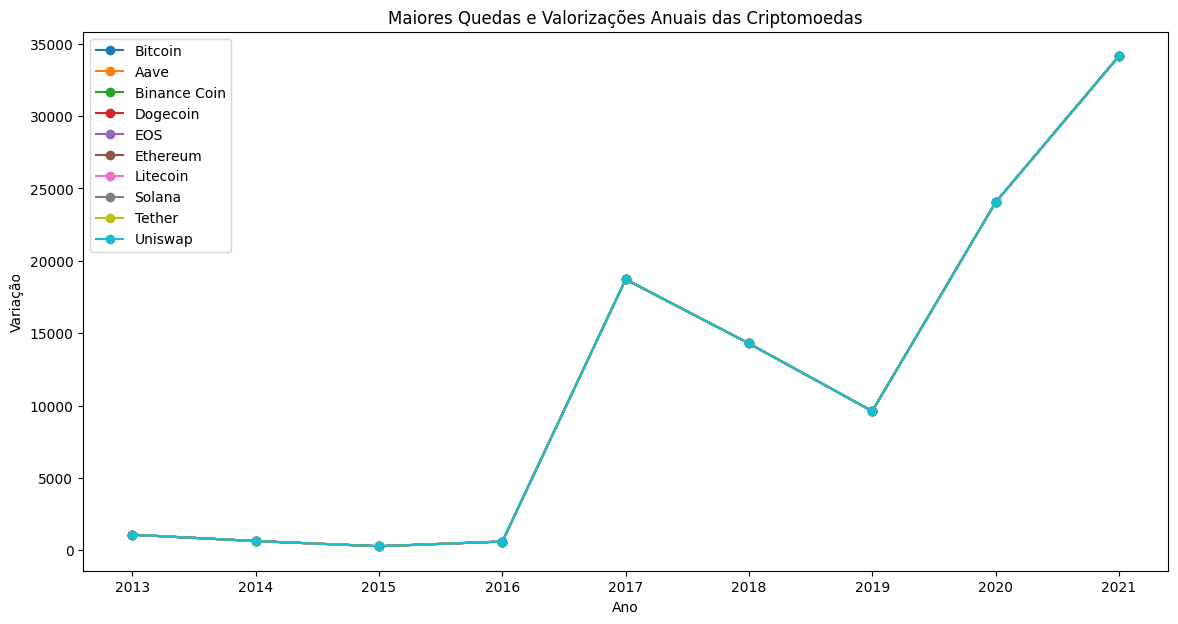

In [ ]:

# Pergunta 4: Em quais anos houve maiores quedas e valorizações?
df['Ano'] = df['Data'].dt.year


criptomoedas = df['Nome'].unique()
variacao_anual = df.groupby(['Ano','Nome'])['Fechamento'].agg(['min', 'max']).reset_index()
variacao_anual['variacao'] = variacao_anual['max'] - variacao_anual['min']

plt.figure(figsize=(14, 7))
for moeda in criptomoedas:
    subset = variacao_anual[variacao_anual['Nome'] == "Bitcoin"] # 'nome' changed to 'Nome'
    plt.plot(subset['Ano'], subset['variacao'], marker='o', label=moeda)

plt.title('Maiores Quedas e Valorizações Anuais das Criptomoedas')
plt.xlabel('Ano')
plt.ylabel('Variação')
plt.legend(loc='upper left')
plt.show()

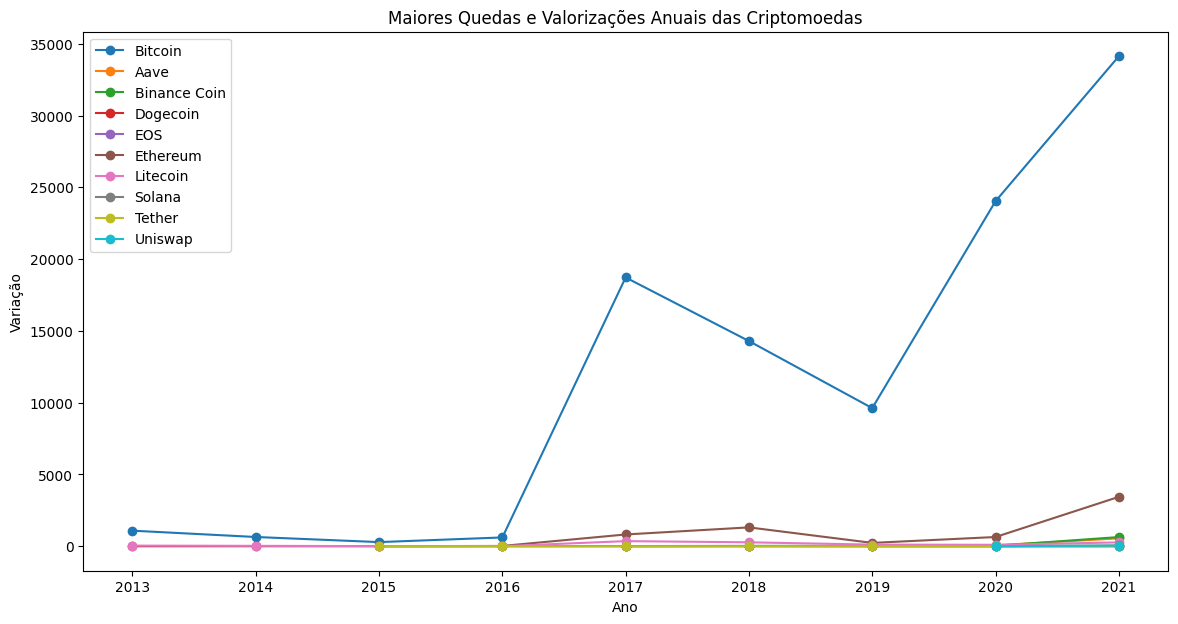

In [ ]:
#Em quais anos houve maiores quedas e valorizações? todas as moedas
df['Ano'] = df['Data'].dt.year

criptomoedas = df['Nome'].unique()
variacao_anual = df.groupby(['Ano','Nome'])['Fechamento'].agg(['min', 'max']).reset_index()
variacao_anual['variacao'] = variacao_anual['max'] - variacao_anual['min']

plt.figure(figsize=(14, 7))
for moeda in criptomoedas:
    subset = variacao_anual[variacao_anual['Nome'] == moeda] # Filter the DataFrame for each cryptocurrency
    plt.plot(subset['Ano'], subset['variacao'], marker='o', label=moeda)

plt.title('Maiores Quedas e Valorizações Anuais das Criptomoedas')
plt.xlabel('Ano')
plt.ylabel('Variação')
plt.legend(loc='upper left')
plt.show()

### Existe alguma tendência de aumento ou queda dos valores pelo dia da semana?

In [ ]:
df['Dia_Semana'] = pd.to_datetime(df['Data']).dt.day_name()  # Extrai o nome do dia da semana da coluna 'Data'

dias_semana_pt = {
    'Monday': 'Segunda-feira',
    'Tuesday': 'Terça-feira',
    'Wednesday': 'Quarta-feira',
    'Thursday': 'Quinta-feira',
    'Friday': 'Sexta-feira',
    'Saturday': 'Sábado',
    'Sunday': 'Domingo'
}
dias = ['Segunda-feira', 'Terça-feira', 'Quarta-feira', 'Quinta-feira', 'Sexta-feira', 'Sábado', 'Domingo']
df['Dia_Semana'] = df['Dia_Semana'].map(dias_semana_pt)
df['Dia_Semana'] = pd.Categorical(df['Dia_Semana'], categories=dias, ordered=True)
media_variacao_dia_semana = df.groupby('Dia_Semana')['valorizacao'].mean()

media_variacao_dia_semana




Dia_Semana
Segunda-feira    5.087954
Terça-feira      2.431872
Quarta-feira     2.441519
Quinta-feira     0.475612
Sexta-feira      2.389866
Sábado           3.744141
Domingo         -1.757364
Name: valorizacao, dtype: float64

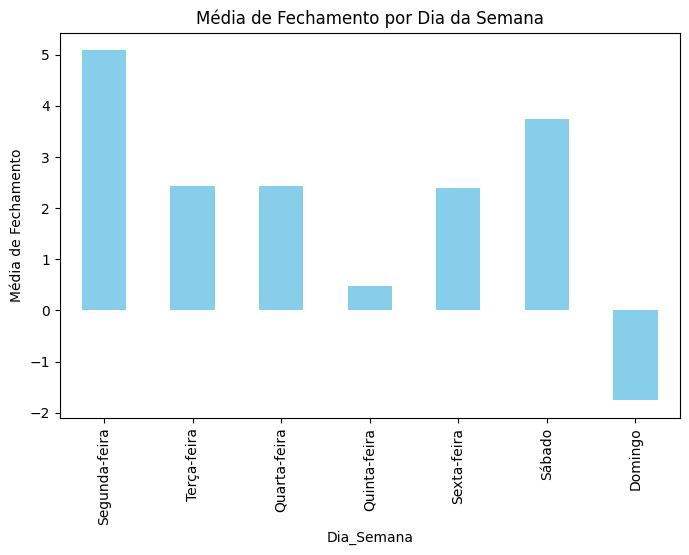

In [ ]:


# Agrupar por dia da semana
# Média de fechamento por dia da semana
avg_by_weekday = df.groupby('Dia_Semana')['valorizacao'].mean()


# Gráfico de barras para visualizar a média de fechamento por dia da semana
plt.figure(figsize=(8, 5))
avg_by_weekday.plot(kind='bar', color='skyblue')
plt.title('Média de Fechamento por Dia da Semana')
plt.xlabel('Dia_Semana')
plt.ylabel('Média de Fechamento')
plt.show()

### Qual moeda se mostra mais interessante em relação à valorização pela análise da série histórica?



In [ ]:
#Calcula o retorno cumulativo para cada criptomoeda e redefine o índice

df['Retorno Acumulado'] = df.groupby('Nome')['Fechamento'].apply(lambda x: (x - x.iloc[0]) / x.iloc[0]).reset_index(level=0, drop=True)

# Identificar a criptomoeda com o maior retorno cumulativo no último registro disponível para cada moeda
ultimos_retornos = df.sort_values('Data').groupby('Nome').tail(1)

df['Retorno Acumulado']

0        0.000000
1       -0.038328
2       -0.190605
3       -0.272105
4       -0.323717
           ...   
17142    1.644780
17143    1.830800
17144    2.011614
17145    1.913503
17146    2.247695
Name: Retorno Acumulado, Length: 17147, dtype: float64

In [ ]:
# Calcular variação percentual total para cada criptomoeda
total_variation = df.groupby('Nome').apply(lambda x: (x['Fechamento'].iloc[-1] - x['Fechamento'].iloc[0]) / x['Fechamento'].iloc[0] * 100)

# Mostrar a criptomoeda com maior valorização
max_variation = total_variation.idxmax()
print(f'Moeda mais valorizada: {max_variation}')

# Mostrar a criptomoeda com menor valorização
min_variation = total_variation.idxmin()
print(f'Moeda menos valorizada: {min_variation}')


Moeda mais valorizada: Ethereum
Moeda menos valorizada: Tether


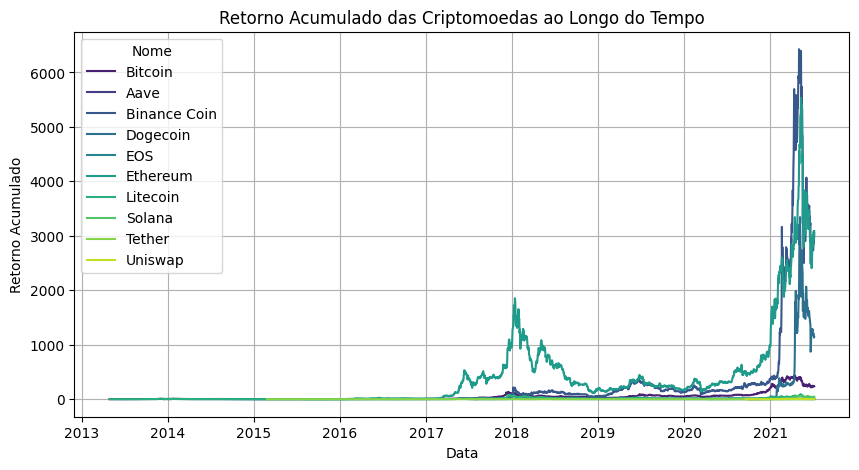

In [ ]:
plt.figure(figsize=(10, 5))
sns.lineplot(x='Data', y='Retorno Acumulado', hue='Nome', data=df, palette='viridis')
plt.title('Retorno Acumulado das Criptomoedas ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Retorno Acumulado')
plt.legend(title='Nome')
plt.grid(True)
plt.show()

In [ ]:
# Qual moeda se mostra mais interessante e a menos pela interessante em relação à valorização análise da série histórica? a lista em ordem decresente

# Calcular variação percentual total para cada criptomoeda
total_variation = df.groupby('Nome').apply(lambda x: (x['Fechamento'].iloc[-1] - x['Fechamento'].iloc[0]) / x['Fechamento'].iloc[0] *100)

# Ordenar as moedas por variação percentual em ordem decrescente
sorted_variations = total_variation.sort_values(ascending=False)

# Imprimir a lista ordenada
print("Moedas em ordem decrescente de valorização:")
for coin, variation in sorted_variations.items():
    print(f"{coin}: {variation:.2f}%")

# Moeda mais valorizada
most_valued = sorted_variations.index[0]
print(f"\nA moeda mais interessante em relação à valorização é: {most_valued}")

# Moeda menos valorizada
least_valued = sorted_variations.index[-1]
print(f"A moeda menos interessante em relação à valorização é: {least_valued}")


Moedas em ordem decrescente de valorização:
Ethereum: 308489.19%
Binance Coin: 305151.02%
Dogecoin: 114402.33%
Bitcoin: 23585.62%
Solana: 4311.47%
Litecoin: 3070.36%
Aave: 495.46%
Uniswap: 224.77%
EOS: 43.26%
Tether: -17.06%

A moeda mais interessante em relação à valorização é: Ethereum
A moeda menos interessante em relação à valorização é: Tether


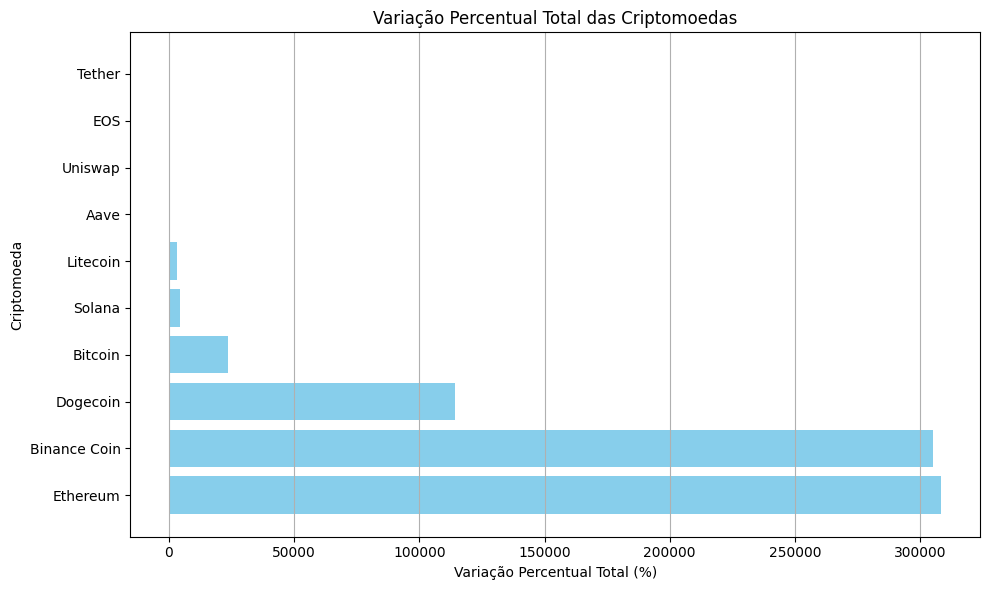

In [ ]:
#grafico de linha horizontal Calcular variação percentual total para cada criptomoeda

import matplotlib.pyplot as plt
# Calcular variação percentual total para cada criptomoeda
total_variation = df.groupby('Nome').apply(lambda x: (x['Fechamento'].iloc[-1] - x['Fechamento'].iloc[0]) / x['Fechamento'].iloc[0] * 100)

# Ordenar as criptomoedas pela variação percentual total
total_variation_sorted = total_variation.sort_values(ascending=False)

# Criar o gráfico de barras horizontais
plt.figure(figsize=(10, 6))
plt.barh(total_variation_sorted.index, total_variation_sorted.values, color='skyblue')
plt.xlabel('Variação Percentual Total (%)')
plt.ylabel('Criptomoeda')
plt.title('Variação Percentual Total das Criptomoedas')
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()


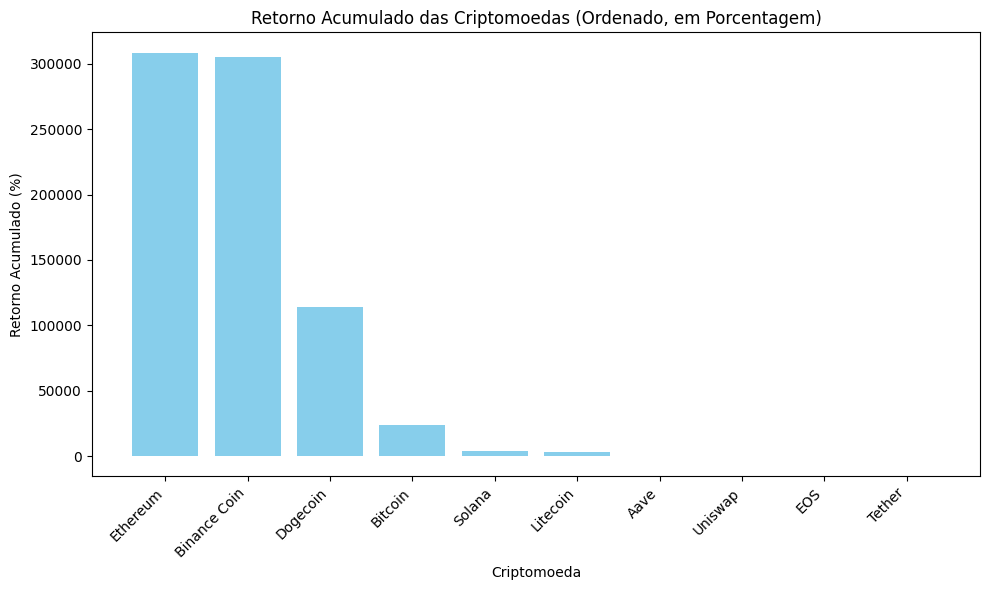

In [ ]:
#grafico2 barra vertical ordenada das moedas com o retorno acumulado para cada criptomoeda com porcentagem

import matplotlib.pyplot as plt
# Calcula o retorno acumulado para cada criptomoeda com porcentagem
retorno_acumulado_pct = df.groupby('Nome')['Fechamento'].apply(lambda x: (x.iloc[-1] - x.iloc[0]) / x.iloc[0] * 100)

# Ordena as moedas pelo retorno acumulado em ordem decrescente
retorno_acumulado_pct_ordenado = retorno_acumulado_pct.sort_values(ascending=False)

# Cria o gráfico de barras verticais ordenado com porcentagem
plt.figure(figsize=(10, 6))
plt.bar(retorno_acumulado_pct_ordenado.index, retorno_acumulado_pct_ordenado.values, color='skyblue')
plt.xlabel('Criptomoeda')
plt.ylabel('Retorno Acumulado (%)')
plt.title('Retorno Acumulado das Criptomoedas (Ordenado, em Porcentagem)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
# lista odenada das moedas com o retorno acumulado para cada criptomoeda sem porcentagem

# Calcula o retorno acumulado para cada criptomoeda
retorno_acumulado = df.groupby('Nome')['Fechamento'].apply(lambda x: x.iloc[-1] - x.iloc[0])

# Ordena as moedas pelo retorno acumulado em ordem decrescente
retorno_acumulado_ordenado = retorno_acumulado.sort_values(ascending=False)

# Imprime a lista ordenada sem porcentagem
print("Moedas em ordem decrescente de retorno acumulado:")
for moeda, retorno in retorno_acumulado_ordenado.items():
    print(f"{moeda}: {retorno:.2f}")


Moedas em ordem decrescente de retorno acumulado:
Bitcoin: 34090.65
Ethereum: 2323.93
Binance Coin: 320.83
Aave: 263.68
Litecoin: 134.60
Solana: 33.49
Uniswap: 15.50
EOS: 1.17
Dogecoin: 0.23
Tether: -0.21


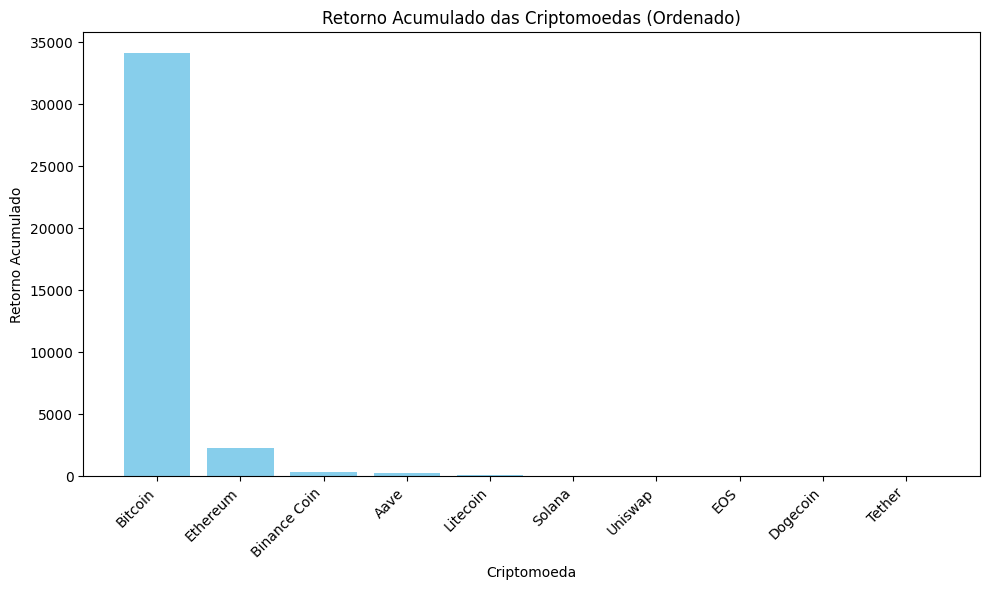

In [ ]:
# grafico barra vertical ordenada das moedas com o retorno acumulado para cada criptomoeda sem porcentagem

import matplotlib.pyplot as plt
# Calcula o retorno acumulado para cada criptomoeda
retorno_acumulado = df.groupby('Nome')['Fechamento'].apply(lambda x: x.iloc[-1] - x.iloc[0])

# Ordena as moedas pelo retorno acumulado em ordem decrescente
retorno_acumulado_ordenado = retorno_acumulado.sort_values(ascending=False)

# Cria o gráfico de barras verticais ordenado
plt.figure(figsize=(10, 6))
plt.bar(retorno_acumulado_ordenado.index, retorno_acumulado_ordenado.values, color='skyblue')
plt.xlabel('Criptomoeda')
plt.ylabel('Retorno Acumulado')
plt.title('Retorno Acumulado das Criptomoedas (Ordenado)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Existe correlação entre os valores para todas as criptomoedas?

*Para verificar a correlação entre os valores das criptomoedas, criaremos uma matriz de correlação.*

> A matriz de correlação apresentada na imagem mostra a relação entre os preços de diferentes criptomoedas. A correlação é uma medida estatística que descreve a extensão e a direção de uma relação linear entre duas variáveis. Ela varia entre -1 e 1, onde:

- 1 indica uma correlação positiva perfeita.

- -1 indica uma correlação negativa perfeita.
- 0 indica que não há correlação linear.

*Em resumo, a matriz de correlação fornece insights valiosos sobre como os preços das criptomoedas estão relacionados entre si. Essa informação é crucial para tomar decisões informadas sobre alocação de portfólio e gerenciamento de risco no mercado de criptomoedas.*

In [ ]:
media_fechamento = df.groupby(['Data','Nome'])['Fechamento'].mean().unstack()

correlacao = media_fechamento.corr().round(2)
correlacao

Nome,Aave,Binance Coin,Bitcoin,Dogecoin,EOS,Ethereum,Litecoin,Solana,Tether,Uniswap
Nome,,,,,,,,,,
Aave,1.00,0.77,0.88,0.61,0.74,0.87,0.87,0.70,0.07,0.93
Binance Coin,0.77,1.00,0.86,0.89,0.15,0.90,0.64,0.95,-0.08,0.92
Bitcoin,0.88,0.86,1.00,0.65,0.12,0.90,0.81,0.72,0.04,0.91
Dogecoin,0.61,0.89,0.65,1.00,0.17,0.84,0.54,0.93,0.00,0.70
EOS,0.74,0.15,0.12,0.17,1.00,0.32,0.59,0.84,-0.09,0.81
Ethereum,0.87,0.90,0.90,0.84,0.32,1.00,0.83,0.93,0.03,0.90
Litecoin,0.87,0.64,0.81,0.54,0.59,0.83,1.00,0.81,0.08,0.91
Solana,0.70,0.95,0.72,0.93,0.84,0.93,0.81,1.00,-0.14,0.81
Tether,0.07,-0.08,0.04,0.00,-0.09,0.03,0.08,-0.14,1.00,-0.00


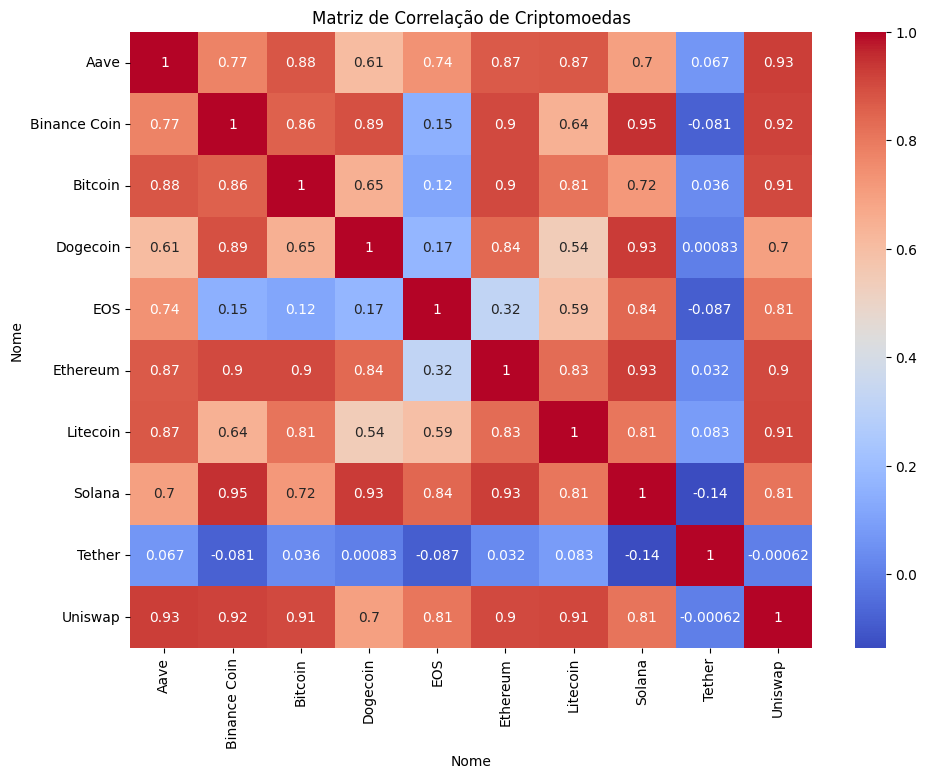

In [ ]:
# Tabela dinâmica para análise de correlação
precos_cripto = df.pivot_table(index='Data', columns='Nome', values='Fechamento')

# Calcular a matriz de correlação
matriz_correlacao = precos_cripto.corr()

# Plotar a matriz de correlação
plt.figure(figsize=(11, 8))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação de Criptomoedas')
plt.show()

**Correlações Fortes (próximas de 1):**

- Aave com Uniswap (0.93)
- Ethereum com Uniswap (0.91)
- Aave com Ethereum (0.87)
- Aave com Litecoin (0.87)
- Litecoin com Uniswap (0.91)

*Essas correlações indicam que os preços de fechamento dessas criptomoedas tendem a se mover de forma muito semelhante ao longo do tempo. Quando uma delas sobe ou desce, é provável que as outras também sigam o mesmo padrão. Isso sugere que essas criptomoedas podem ter fatores de mercado similares influenciando seus preços.*




---



**Correlações Moderadas (entre 0.5 e 0.8):**

- Ethereum com Bitcoin (0.90)
- Aave com Bitcoin (0.88)
- Ethereum com Litecoin (0.83)
- Solana com Ethereum (0.93)
- Solana com Uniswap (0.81)

*Essas correlações também são significativas, mas um pouco menos fortes do que as mencionadas anteriormente. Ainda assim, elas indicam uma tendência de movimento conjunto entre essas criptomoedas.*


---


**Correlações Fracas (próximas de 0):**

- Tether com todas as outras criptomoedas, exceto Solana (correlações muito próximas de 0)

*Tether (USDT), sendo uma stablecoin, mantém seu valor próximo ao do dólar dos EUA. Portanto, não é esperado que ele tenha correlações significativas com as outras criptomoedas, que são voláteis e podem flutuar independentemente do dólar.*


### Pergunta Adicional 1: Existe uma relação entre o volume de negociação e a valorização das criptomoedas?

Correlação entre Volume de Negociação e Valorização:
 Nome                
Uniswap       Volume    0.185125
Dogecoin      Volume    0.183462
Aave          Volume    0.126648
Binance Coin  Volume    0.094886
EOS           Volume    0.068784
Solana        Volume    0.037966
Litecoin      Volume    0.026471
Ethereum      Volume    0.004157
Bitcoin       Volume    0.004034
Tether        Volume    0.003844
Name: Mudança de preço, dtype: float64


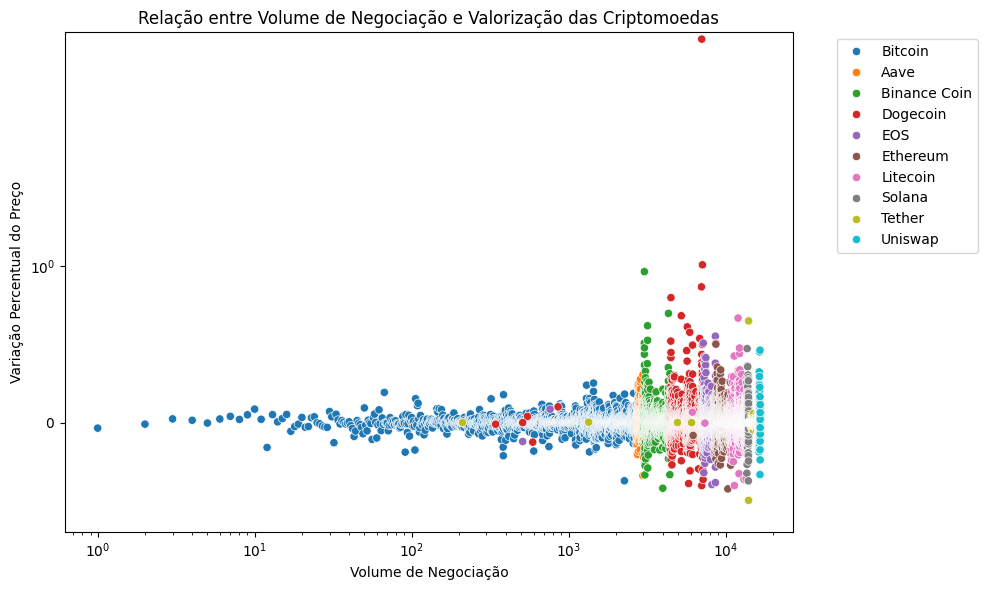

In [ ]:
# Calcular a correlação entre o volume e a valorização (variação percentual do preço)
df['Mudança de preço'] = df.groupby('Nome')['Fechamento'].pct_change()
correlation_volume_price_change = df.groupby('Nome')[['Volume', 'Mudança de preço']].corr().iloc[0::2, -1]

# Mostrar as correlações ordenadas por valor absoluto
correlation_volume_price_change = correlation_volume_price_change.abs().sort_values(ascending=False)
print('Correlação entre Volume de Negociação e Valorização:\n', correlation_volume_price_change.head(10))

# Gráfico de dispersão para visualizar a relação entre Volume e Valorização
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Volume', y='Mudança de preço', hue='Nome', data=df)
plt.title('Relação entre Volume de Negociação e Valorização das Criptomoedas')
plt.xlabel('Volume de Negociação')
plt.ylabel('Variação Percentual do Preço')
plt.xscale('log')  # escala logarítmica para melhor visualização
plt.yscale('symlog')  # escala logarítmica simétrica para melhor visualização
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Pergunta Adicional 2: se tivesse comprado 1000 dollares em bitcoins em 2013 qual seria o lucro em porcentagem em 2021?

### Pergunta Adicional 3: Qual é a volatilidade das criptomoedas ao longo do tempo?

Criptomoedas mais voláteis:
 Nome
Bitcoin         11298.141921
Ethereum          601.078766
Aave              161.649917
Binance Coin      115.390917
Litecoin           63.240464
Solana             14.114444
Uniswap            12.775789
EOS                 3.141473
Dogecoin            0.062559
Tether              0.014951
Name: Fechamento, dtype: float64


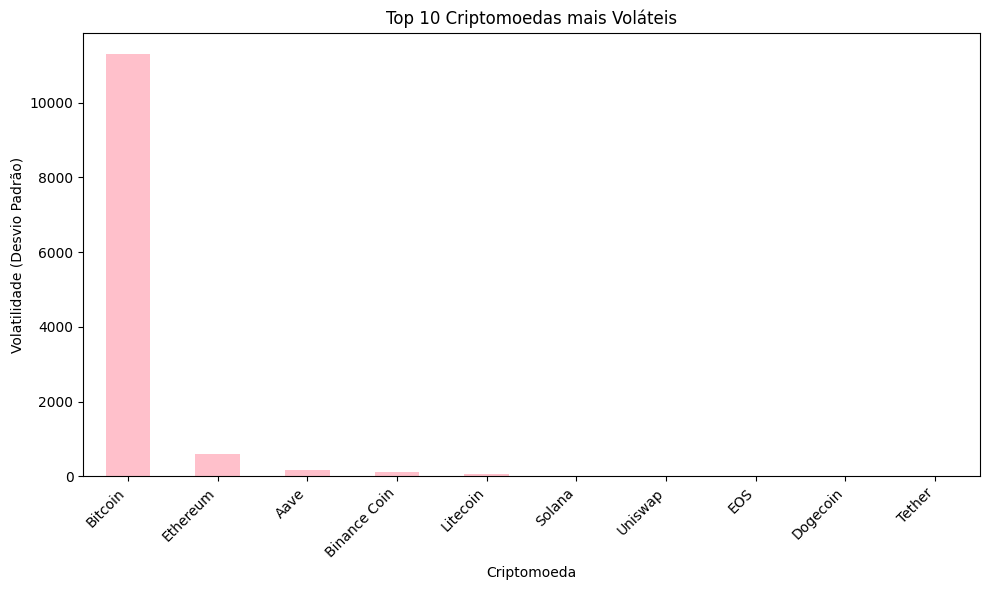

In [ ]:
# Calcular a volatilidade das criptomoedas (desvio padrão dos retornos diários)
daily_returns = df.groupby('Nome')['Fechamento']
volatility = daily_returns.std() # Remove the extra groupby

# Ordenar por ordem decrescente de volatilidade
volatility_sorted = volatility.sort_values(ascending=False)
print('Criptomoedas mais voláteis:\n', volatility_sorted.head(10))

# Gráfico de barras para visualizar a volatilidade das 10 criptomoedas mais voláteis
plt.figure(figsize=(10, 6))
volatility_sorted.head(10).plot(kind='bar', color='pink')
plt.title('Top 10 Criptomoedas mais Voláteis')
plt.xlabel('Criptomoeda')
plt.ylabel('Volatilidade (Desvio Padrão)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Converter a coluna de Data para o formato datetime
df['Data'] = pd.to_datetime(df['Data'])

# Filtrar apenas os dados do Bitcoin
df_btc = df[df['Nome'] == 'Bitcoin']

# Filtrar dados de 2013
dados_2013 = df_btc[df_btc['Data'].dt.year == 2013]

# Encontrar o menor valor de fechamento em 2013
preco_min_2013 = dados_2013['Fechamento'].min()

# Filtrar dados de 2021
dados_2021 = df_btc[df_btc['Data'].dt.year == 2021]

# Encontrar o maior valor de fechamento em 2021
preco_max_2021 = dados_2021['Fechamento'].max()

# Calcular a porcentagem de lucro
lucro_percentual = ((preco_max_2021 - preco_min_2013) / preco_min_2013) * 100

# Calcular o lucro em dólares para um investimento de $1000
investimento_inicial = 1000
lucro_dolar = investimento_inicial * (lucro_percentual / 100)

# Exibir os resultados
print(f"Preço inicial do Bitcoin (menor valor em 2013): ${preco_min_2013:.2f}")
print(f"Preço final do Bitcoin (maior valor em 2021): ${preco_max_2021:.2f}")
print(f"Se você tivesse investido $1000 em Bitcoins em 2013, teria um lucro de {lucro_percentual:.2f}% em 2021.")
print(f"Seu lucro seria de aproximadamente ${lucro_dolar:.2f}.")

Preço inicial do Bitcoin (menor valor em 2013): $68.43
Preço final do Bitcoin (maior valor em 2021): $63503.46
Se você tivesse investido $1000 em Bitcoins em 2013, teria um lucro de 92699.25% em 2021.
Seu lucro seria de aproximadamente $926992.55.


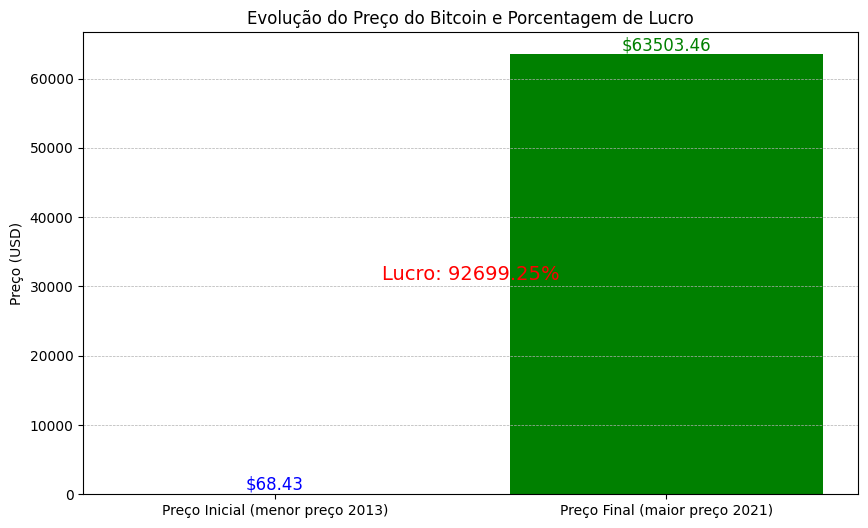

In [ ]:
preco_inicial = preco_min_2013 # Menor valor de fechamento em 2013
preco_final = preco_max_2021  # Maior valor de fechamento em 2021

# Calcular o lucro percentual
lucro_percentual = ((preco_final - preco_inicial) / preco_inicial) * 100

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))

# Barras para o preço inicial e final
plt.bar(['Preço Inicial (menor preço 2013)', 'Preço Final (maior preço 2021)'], [preco_inicial, preco_final], color=['blue', 'green'])

# Texto para os valores
plt.text(0, preco_inicial, f'${preco_inicial:.2f}', ha='center', va='bottom', fontsize=12, color='blue')
plt.text(1, preco_final, f'${preco_final:.2f}', ha='center', va='bottom', fontsize=12, color='green')

# Título e rótulos
plt.title('Evolução do Preço do Bitcoin e Porcentagem de Lucro')
plt.ylabel('Preço (USD)')

# Exibir a porcentagem de lucro no gráfico
plt.text(0.5, (preco_final + preco_inicial) / 2, f'Lucro: {lucro_percentual:.2f}%', ha='center', va='center', fontsize=14, color='red')

# Mostrar o gráfico
plt.grid(True, linestyle='--', linewidth=0.5, axis='y')
plt.show()